# Problema 1


1.1 Solutia in forma inchisa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import math

In [ ]:
class LinearRegression(object):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w
        N, D = X.shape
        self.w = np.zeros(D)
        self.w = np.linalg.pinv(X) @ t
        # end 
        
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """
        # TODO codul vostru aici: calculati valoarea prezisa de modelul vostru
        N, D = X.shape
        y = np.zeros(N)
        
        y = X @ self.w
        # end codul vostru aici
        
        if return_std:
            # TODO codul vostru aici: intoarceti un vector de aceeasi dimensiune cu y, care 
            # are in fiecare pozitie o valoare egala cu deviatia standard a modelului antrenat (i.e. sqrt(var))
            y_std = np.zeros_like(y)
            for i in range(0,len(y_std)-1):
                y_std[i] = np.sqrt(self.var)
            return y, y_std
        return y


def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))
  
def root_mean_squared_error(y, t):
    return math.sqrt(np.mean((t - y) * (t - y)))

def split_dataset(X, T, train=.8):
    N = X.shape[0]
    N_train = int(round(N * train))
    N_test = N - N_train

    X_train, X_test = X[:N_train,:], X[N_train:,:]
    T_train, T_test = T[:N_train], T[N_train:]
    return X_train, T_train, X_test, T_test

def extract_polynomial_features(X, M):
    phi = X
    # TODO codul vostru aici: intoarceti valorile phi_n astfel incat pentru fiecare 
    # intrare x phi_n = [1, x, x^2, ..., x^M]
    phi =  np.array([x ** np.arange(M + 1) for x in X])
    # end
    
    # nota: phi trebuie sa fie la final un np.array de dimensiune (N, M+1), unde N este numarul de linii din X
    return phi

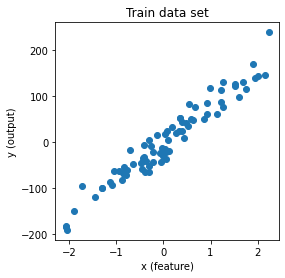

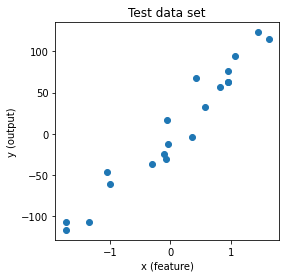

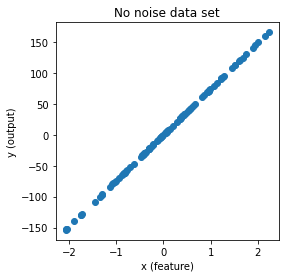

Mean Squared Error
Train error: 449.6332334520888
Test  error: 420.7859565018742
Root Mean Squared Error
Train error: 21.204556902988774
Test  error: 20.51306794465114


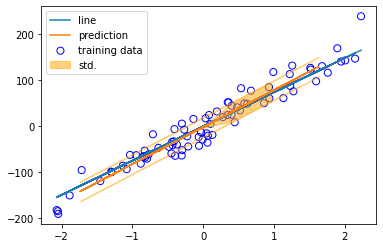

In [ ]:
# Simple dataset
n_samples = 100
n_features = 1
noise = 20
X_full, t_full = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
X_train, t_train, X_test, t_test = split_dataset(X_full, t_full)
X_real, t_real = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=0., random_state=37)
fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Train data set")
plt.scatter(X_train, t_train)
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Test data set")
plt.scatter(X_test, t_test)
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("No noise data set")
plt.scatter(X_real, t_real)
plt.show()


model = LinearRegression()
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model.fit(X_train_feat, t_train)
y_train = model.predict(X_train_feat, False)
y_test, y_test_std = model.predict(X_test_feat, True)

print("Mean Squared Error")
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

print("Root Mean Squared Error")
print("Train error:", root_mean_squared_error(y_train, t_train))
print("Test  error:", root_mean_squared_error(y_test, t_test))

plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="line")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    np.squeeze(X_test), y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

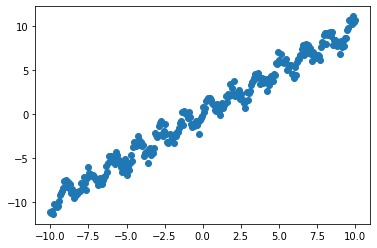

Mean Squared Error
Train error: 0.0005711278952765142
Root Mean Squared Error
Train error: 0.02389828226623232


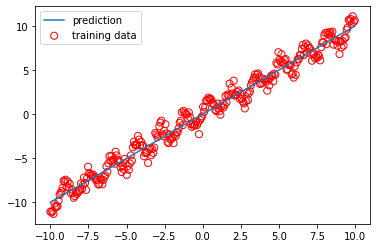

In [ ]:
# Complex dataset
n_samples = 300
x = np.linspace(-10, 10, n_samples) # coordinates
noise_sample = np.random.normal(0, 0.5, n_samples)
sine_wave = x + np.sin(4*x) + noise_sample
plt.plot(x, sine_wave, 'o');
plt.show()


model = LinearRegression()
X_train_feat = extract_polynomial_features(x, 1)

model.fit(X_train_feat, sine_wave)

y_train = np.zeros(x.size)
y_train = model.predict(X_train_feat, False)

print("Mean Squared Error")
print("Train error:", mean_squared_error(y_train, x))

print("Root Mean Squared Error")
print("Train error:", root_mean_squared_error(y_train, x))

plt.scatter(x, sine_wave, facecolor="none", edgecolor="r", s=50, label="training data")
# plt.plot(X_real, t_real, label="line")
plt.plot(x, y_train, label="prediction")
# plt.fill_between(
#     np.squeeze(X_test), y_test - y_test_std, y_test + y_test_std,
#     color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

1.2 Gradient Descent


In [ ]:
def cost_function(y, t):
   return 1/2 * np.sum((y - t) * (y- t))

def train_gradient_descent(X, T, lr=.01, epochs_no=100):
  (N, D) = X.shape
  X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
  W = np.random.randn((D+1))
  error = []
  for i in range(epochs_no):
    y = X_hat @ W
    W = W - lr * np.transpose(X_hat)@(y - T)/N
    error.append(mean_squared_error(y, T))
  return W, error


Test error = 6472.5166190633445 Learning rate = 0.001


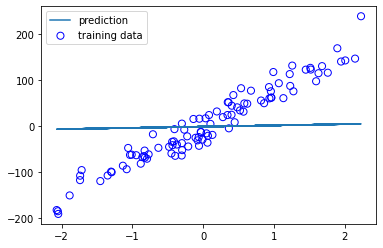

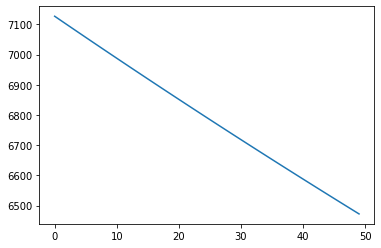

Test error = 2797.5553706969845 Learning rate = 0.01


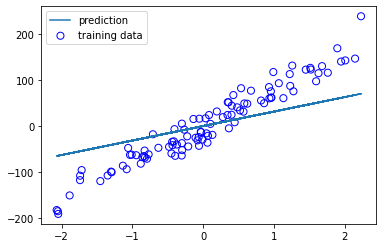

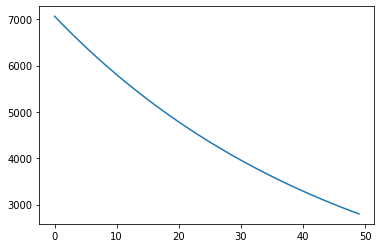

Test error = 439.7960500908596 Learning rate = 0.1


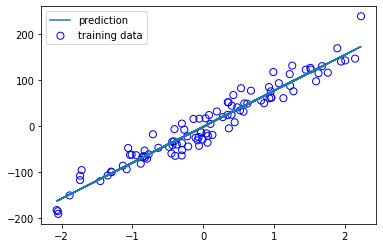

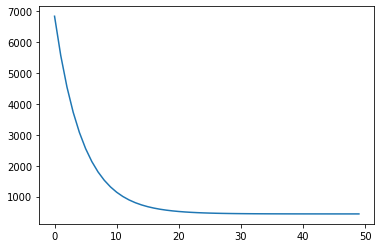

Test error = 439.64177962450617 Learning rate = 0.5


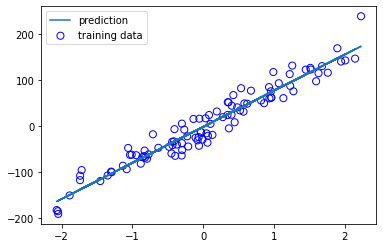

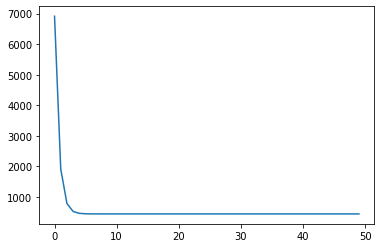

Test error = 439.64178151796693 Learning rate = 0.2


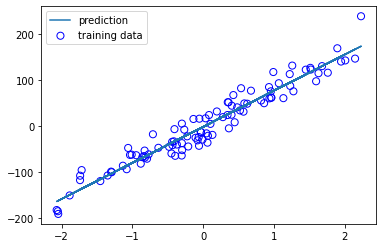

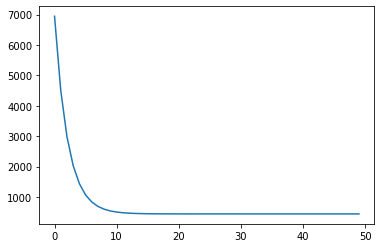


Test error = 2787.6813470824327 Learning rate = 0.009548883827190836


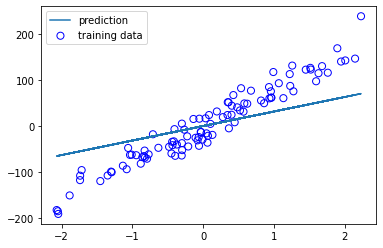

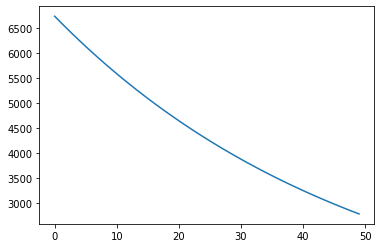

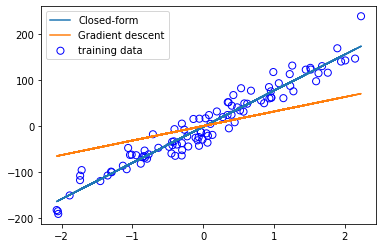

In [ ]:
# Simple dataset
n_samples = 100
n_features = 1
noise = 20
X_full, t_full = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)

plot_x = [i for i in range(50)]

W, error = train_gradient_descent(X_full, t_full, 10**(-3), 50)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[len(error) - 1], "Learning rate =", 10**(-3))
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

plt.plot(plot_x, error)
plt.show()

W, error = train_gradient_descent(X_full, t_full, 10**(-2), 50)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[len(error) - 1], "Learning rate =",10**(-2))
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

plt.plot(plot_x, error)
plt.show()

W, error = train_gradient_descent(X_full, t_full, 10**(-1), 50)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[len(error) - 1], "Learning rate =", 10**(-1))
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

plt.plot(plot_x, error)
plt.show()

W, error = train_gradient_descent(X_full, t_full, 1/2, 50)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[len(error) - 1], "Learning rate =", 1/2)
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

plt.plot(plot_x, error)
plt.show()

W, error = train_gradient_descent(X_full, t_full, 1/5, 50)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[len(error) - 1], "Learning rate =", 1/5)
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

plt.plot(plot_x, error)
plt.show()



print()
lr_newton_raphson = 1/max(np.linalg.eigh(np.transpose(X_full) @ X_full))
W, error = train_gradient_descent(X_full, t_full, lr_newton_raphson[0], 50)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[len(error) - 1], "Learning rate =", lr_newton_raphson[0])
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

plt.plot(plot_x, error)
plt.show()


model = LinearRegression()
X_full_feat = extract_polynomial_features(X_full, 1)

model.fit(X_full_feat, t_full)


y_full = np.zeros(X_full.size)
y_full = model.predict(X_full_feat, False)


plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, y_full, label="Closed-form")
plt.plot(X_full, Y, label="Gradient descent")
plt.legend()
plt.show()



1.3 Mini-Batch Gradient Descent

In [ ]:
def train_mini_batch_gradient_descent(X, T, batch_size=20, lr=.01, epochs_no=100):
  (N_total, D) = X.shape
  W = np.random.randn((D+1))
  error = []
  for i in range(epochs_no):
    # y = X_hat @ W
    # W = W - lr * np.transpose(X_hat)@(y - T)/N
    # error.append(cost_function(y, T))
    
    for j in range(0, len(X), batch_size):
      X_batch = X[j:j+batch_size]
      T_batch = T[j:j+batch_size]
      N = X_batch.shape[0]
      X_batch_hat = np.concatenate([X_batch, np.ones((N, 1))], axis=1)
      Y_batch = X_batch_hat @ W
      W = W - lr * np.transpose(X_batch_hat)@(Y_batch - T_batch)/batch_size
      error.append(cost_function(Y_batch, T_batch))
      # print(cost_function(Y_batch, T_batch))
  return W, error

Test error = 3763.2484612427597 Learning rate = 0.01


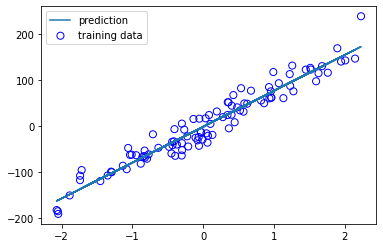

In [ ]:
n_samples = 100
n_features = 1
noise = 20
X_full, t_full = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)

plot_x = [i for i in range(50)]
W, error = train_mini_batch_gradient_descent(X_full, t_full, 20, 0.01, 100)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[-1], "Learning rate =", 0.01)
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

# plt.plot(plot_x, error)
# plt.show()

1.4 Stochastic Gradient Descent

In [ ]:
def train_stochastic_gradient_descent(X, T, lr=.01, epochs_no=100):
  (N_total, D) = X.shape
  W = np.random.randn((D+1))
  error = []
  for i in range(epochs_no):
    indices = np.random.permutation(N_total)
    x_rand = X[indices]
    t_rand = T[indices]
    for j in range(0, len(X)):
      X_batch = x_rand[j].reshape(1, D)
      T_batch = t_rand[j].reshape(1, 1)
      N = X_batch.shape[0]
      X_batch_hat = np.concatenate([X_batch, np.ones((N, 1))], axis=1)
      Y_batch = X_batch_hat @ W
      W = W - lr * np.transpose(X_batch_hat)@(Y_batch - T_batch)
      error.append(cost_function(Y_batch, T_batch))
      # print(cost_function(Y_batch, T_batch))
  return W, error

Test error = 133.19666289223244 Learning rate = 0.01


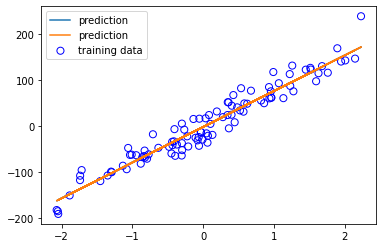

In [ ]:
n_samples = 100
n_features = 1
noise = 20
X_full, t_full = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)

plot_x = [i for i in range(50)]

W, error = train_stochastic_gradient_descent(X_full, t_full)
X_hat = np.concatenate([X_full, np.ones((X_full.shape[0], 1))], axis=1)
Y = X_hat @ W
print("Test error =", error[-1], "Learning rate =", 0.01)
plt.scatter(X_full, t_full, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_full, Y, label="prediction")
plt.legend()
plt.show()

# plt.plot(plot_x, error)
# plt.show()

# Problema 2

In [ ]:
class RidgeRegression(LinearRegression):
    """
    Modelul de regresie liniara, folosind regularizare L2
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """

    def __init__(self, alpha:float=1.):
        super(RidgeRegression, self).__init__()
        self.alpha = alpha

        
    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting), tinand cont si de regularizare
        Parameterii
        ----------
         X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w, conform formulei de la punctul 5 
        N, D = X.shape
        self.w = np.zeros(D)
        X_t = np.transpose(X)
        self.w = np.linalg.inv(X_t @ X + self.alpha * np.identity(D)) @ X_t @ t
        
        # end
        
        self.var = np.mean(np.square(X @ self.w - t))

Mean Squared Error
Train error: 449.6882648528307
Test  error: 416.17536354083757
Root Mean Squared Error
Train error: 21.20585449475759
Test  error: 20.400376553898155


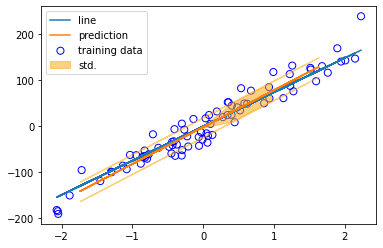

{0.0: 462.23603976172325, 0.05: 462.2446203864934, 0.1: 460.499661906925, 0.15000000000000002: 462.3125576182245, 0.2: 461.65218203442447, 0.25: 461.2323347573275, 0.30000000000000004: 460.8343037930334, 0.35000000000000003: 460.98388751428, 0.4: 461.9083813034403, 0.45: 461.8490653074913, 0.5: 461.6023472715071, 0.55: 462.0425613081954, 0.6000000000000001: 462.25570208487113, 0.65: 462.3357644194474, 0.7000000000000001: 462.3751426498368, 0.75: 461.7620795267618, 0.8: 462.18351385566285, 0.8500000000000001: 462.8211697582314, 0.9: 461.8685403243004, 0.9500000000000001: 462.4215122705553, 1.0: 462.4897840627935, 1.05: 461.0097075241968, 1.1: 462.4033476483488, 1.1500000000000001: 463.4052312033493, 1.2000000000000002: 462.74194777486184, 1.25: 462.12035948312723, 1.3: 463.4397553498027, 1.35: 464.2809545301502, 1.4000000000000001: 462.61337932018614, 1.4500000000000002: 462.74397777847474, 1.5: 463.0040822536854, 1.55: 464.3395269948912, 1.6: 463.86729033173157, 1.6500000000000001: 464

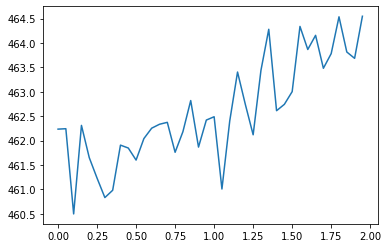

{0.0: 460.7957372696022, 0.05: 461.83943828035666, 0.1: 460.6708703308996, 0.15000000000000002: 461.9989403287682, 0.2: 460.4158330113538, 0.25: 462.5321826334124, 0.30000000000000004: 462.2754193832423, 0.35000000000000003: 462.7241158381825, 0.4: 459.8625303203362, 0.45: 462.70799407824234, 0.5: 460.95233473030225, 0.55: 461.89691116968345, 0.6000000000000001: 461.5144239932374, 0.65: 462.48921415692496, 0.7000000000000001: 462.3425302946829, 0.75: 462.6735461735849, 0.8: 463.48369080469064, 0.8500000000000001: 461.61451241691907, 0.9: 462.89910742584345, 0.9500000000000001: 462.4266956451176, 1.0: 462.953131695603, 1.05: 462.48293151767984, 1.1: 462.53235290317417, 1.1500000000000001: 462.1381584196119, 1.2000000000000002: 462.95313624704545, 1.25: 462.7869970695196, 1.3: 462.6049185514402, 1.35: 462.79776033687085, 1.4000000000000001: 462.33383080437636, 1.4500000000000002: 462.59145016009285, 1.5: 463.32140384301204, 1.55: 463.99953397162693, 1.6: 463.2807767488365, 1.650000000000

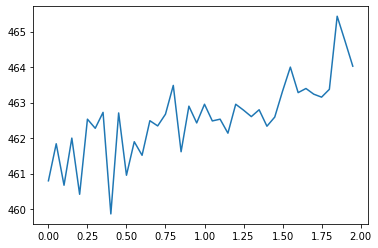

{0.0: 462.0935741595622, 0.05: 462.1349451716147, 0.1: 462.0607325831962, 0.15000000000000002: 461.0478401311912, 0.2: 462.26888869950824, 0.25: 462.7952254871692, 0.30000000000000004: 462.27238813492596, 0.35000000000000003: 462.0317959734526, 0.4: 462.3235601540641, 0.45: 461.4037849316055, 0.5: 461.9294301946903, 0.55: 462.0599695699814, 0.6000000000000001: 462.1351799546651, 0.65: 462.4087786573048, 0.7000000000000001: 461.09866041890615, 0.75: 461.7220882007655, 0.8: 462.2660834097154, 0.8500000000000001: 461.69461835441575, 0.9: 462.5448678119915, 0.9500000000000001: 462.2008453762475, 1.0: 461.6295358813105, 1.05: 462.50055079342513, 1.1: 463.0431151297715, 1.1500000000000001: 462.96347701326573, 1.2000000000000002: 463.88624370121914, 1.25: 463.10337561252544, 1.3: 462.27748616706936, 1.35: 462.1296252531842, 1.4000000000000001: 462.69338281922956, 1.4500000000000002: 463.66428693413275, 1.5: 463.8927398451726, 1.55: 462.5551135777518, 1.6: 462.9495548483615, 1.6500000000000001

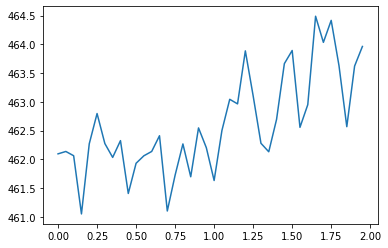

{0.0: 461.3664394302556, 0.05: 461.7750434723284, 0.1: 461.85647892823647, 0.15000000000000002: 461.4769751106561, 0.2: 461.5679375002382, 0.25: 461.6312817737943, 0.30000000000000004: 461.29557459049835, 0.35000000000000003: 461.92914876663923, 0.4: 462.3886048759283, 0.45: 462.8344060238718, 0.5: 461.5173578093393, 0.55: 461.5188729998616, 0.6000000000000001: 461.64795221822504, 0.65: 461.9863546192918, 0.7000000000000001: 462.61076782796647, 0.75: 461.89886747909736, 0.8: 462.907211549432, 0.8500000000000001: 462.37375946001765, 0.9: 462.31184254719875, 0.9500000000000001: 462.211626069909, 1.0: 462.67093693432594, 1.05: 462.0105897916547, 1.1: 462.6569971458753, 1.1500000000000001: 463.54856148738037, 1.2000000000000002: 462.2485013318222, 1.25: 462.84998969307134, 1.3: 462.9836107886145, 1.35: 462.99537253018826, 1.4000000000000001: 463.0268597571534, 1.4500000000000002: 463.195366944936, 1.5: 462.19002383130555, 1.55: 464.05296599488497, 1.6: 464.20745771657903, 1.650000000000000

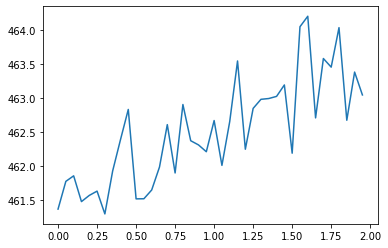

{0.0: 460.78441859968484, 0.05: 460.77626350447713, 0.1: 462.59122218630415, 0.15000000000000002: 461.3678351063664, 0.2: 461.9343124608709, 0.25: 461.78282603658795, 0.30000000000000004: 461.81276776004484, 0.35000000000000003: 461.12240950038563, 0.4: 461.52463720971696, 0.45: 462.51398113420845, 0.5: 462.30370978954755, 0.55: 462.80888097447934, 0.6000000000000001: 461.66110687033205, 0.65: 461.8533414248912, 0.7000000000000001: 462.003178336031, 0.75: 461.8171026430678, 0.8: 462.0699960028837, 0.8500000000000001: 461.82639461269696, 0.9: 461.21294194472284, 0.9500000000000001: 461.1826398018789, 1.0: 462.04995644382586, 1.05: 461.71616644295824, 1.1: 461.9686221220549, 1.1500000000000001: 462.67974709844776, 1.2000000000000002: 463.30694830341497, 1.25: 464.0916732063025, 1.3: 463.575605057797, 1.35: 462.9624764300643, 1.4000000000000001: 463.1829254921746, 1.4500000000000002: 462.4010469206557, 1.5: 462.77926919684415, 1.55: 463.303442149299, 1.6: 462.76069545328033, 1.65000000000

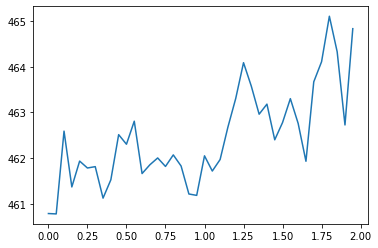

{0.0: 462.27274815106944, 0.05: 461.8178555773968, 0.1: 461.5628770486893, 0.15000000000000002: 461.4587857331241, 0.2: 461.5799640094336, 0.25: 462.19458955672735, 0.30000000000000004: 461.55898931078696, 0.35000000000000003: 462.0832598390742, 0.4: 461.8011087657239, 0.45: 463.3022953157676, 0.5: 461.56208541667576, 0.55: 461.4868727236705, 0.6000000000000001: 461.91181427907304, 0.65: 461.5142545078142, 0.7000000000000001: 461.9883797459404, 0.75: 461.78817970208877, 0.8: 462.0547400404609, 0.8500000000000001: 462.7647610100606, 0.9: 462.3771113832329, 0.9500000000000001: 461.1247708222178, 1.0: 462.0382343751876, 1.05: 463.05763696702655, 1.1: 461.76371077950324, 1.1500000000000001: 463.60468639307965, 1.2000000000000002: 463.262782313792, 1.25: 462.64348348848364, 1.3: 463.39538454644645, 1.35: 461.7205908245556, 1.4000000000000001: 462.9970715361089, 1.4500000000000002: 463.0075312168125, 1.5: 462.2091051373559, 1.55: 463.88761814831315, 1.6: 463.8015075773317, 1.6500000000000001

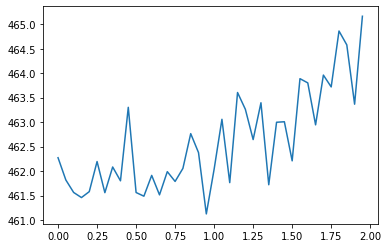

{0.0: 461.35259478154734, 0.05: 460.59365857155376, 0.1: 460.11385426484196, 0.15000000000000002: 461.58560814411067, 0.2: 462.1858854964239, 0.25: 461.94331673027807, 0.30000000000000004: 461.89830688077814, 0.35000000000000003: 460.9881708092156, 0.4: 462.08577918632545, 0.45: 461.562826947697, 0.5: 461.4857892526931, 0.55: 462.63091115339034, 0.6000000000000001: 462.129943182709, 0.65: 461.0825744180134, 0.7000000000000001: 461.1109125629357, 0.75: 462.7116313076398, 0.8: 462.4248523189357, 0.8500000000000001: 461.06285853600036, 0.9: 460.91524881938864, 0.9500000000000001: 461.14954116922337, 1.0: 461.42691752529703, 1.05: 462.0700540445514, 1.1: 461.62836776288935, 1.1500000000000001: 462.609466680731, 1.2000000000000002: 463.2053099372601, 1.25: 461.09715329387154, 1.3: 463.07777254457756, 1.35: 462.61800835799204, 1.4000000000000001: 462.5341108728664, 1.4500000000000002: 463.59032936604984, 1.5: 463.0661078759593, 1.55: 462.8437572217978, 1.6: 463.1424658835752, 1.6500000000000

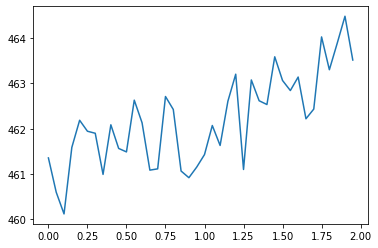

{0.0: 461.0333369668793, 0.05: 461.60546133023854, 0.1: 462.1456230862752, 0.15000000000000002: 462.25697169852145, 0.2: 462.1163594633229, 0.25: 462.04413836784, 0.30000000000000004: 461.34567344868213, 0.35000000000000003: 461.3216686974542, 0.4: 460.8639229392273, 0.45: 462.4513422572251, 0.5: 461.15258370571064, 0.55: 461.9330157432796, 0.6000000000000001: 462.2040852525294, 0.65: 461.92249329814746, 0.7000000000000001: 461.13750469587285, 0.75: 461.7219199767147, 0.8: 462.0842759570721, 0.8500000000000001: 461.80117307339856, 0.9: 461.5341541306367, 0.9500000000000001: 461.3480642761985, 1.0: 462.2947965775617, 1.05: 461.9696657356859, 1.1: 462.92482932430636, 1.1500000000000001: 462.0524406385281, 1.2000000000000002: 463.18884503941473, 1.25: 462.22219458517856, 1.3: 462.04615634486214, 1.35: 463.2387404539679, 1.4000000000000001: 463.62746467798246, 1.4500000000000002: 463.27083130125794, 1.5: 463.0626750087414, 1.55: 463.4525735488881, 1.6: 464.45214576272906, 1.650000000000000

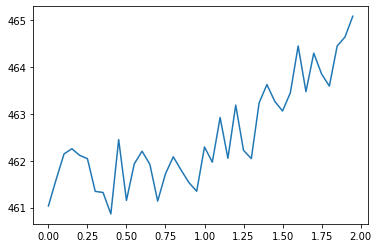

{0.0: 459.6908810652546, 0.05: 461.2880941701723, 0.1: 461.1527974916694, 0.15000000000000002: 461.6977346834595, 0.2: 460.26262513522903, 0.25: 461.2073737005283, 0.30000000000000004: 461.1540444616, 0.35000000000000003: 462.14890795835953, 0.4: 460.5783949840566, 0.45: 461.0826802401239, 0.5: 462.32328102900334, 0.55: 461.3725328225143, 0.6000000000000001: 461.50199452293356, 0.65: 460.9989276241309, 0.7000000000000001: 462.31563253390766, 0.75: 461.3647017555196, 0.8: 461.5379652285255, 0.8500000000000001: 462.0136622675784, 0.9: 462.66928649901024, 0.9500000000000001: 462.06617617093053, 1.0: 461.7110050760907, 1.05: 463.37546159588965, 1.1: 462.5935481269179, 1.1500000000000001: 461.0977679644528, 1.2000000000000002: 462.7066567520591, 1.25: 462.671873459767, 1.3: 461.6015998065326, 1.35: 463.0742613048821, 1.4000000000000001: 462.5426270842059, 1.4500000000000002: 462.99541294438706, 1.5: 463.25393147662743, 1.55: 464.01804042260414, 1.6: 464.3876033705096, 1.6500000000000001: 46

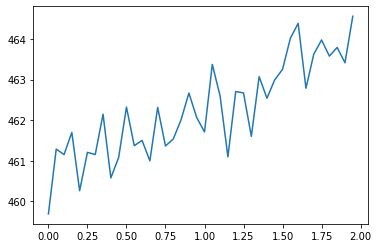

{0.0: 462.59665219397283, 0.05: 461.9098981581863, 0.1: 460.99080212977833, 0.15000000000000002: 461.44587056919255, 0.2: 462.4681134463908, 0.25: 461.1261948108626, 0.30000000000000004: 461.33627878604574, 0.35000000000000003: 461.2665216800777, 0.4: 461.5068020917906, 0.45: 461.7184077729315, 0.5: 460.85594358258135, 0.55: 461.64715939281217, 0.6000000000000001: 462.3235562490113, 0.65: 463.163359526593, 0.7000000000000001: 461.1736650610401, 0.75: 461.92539316689465, 0.8: 462.61260304025024, 0.8500000000000001: 462.0583632340351, 0.9: 462.4060459124444, 0.9500000000000001: 462.59116764094637, 1.0: 461.3984290432417, 1.05: 462.5096663492998, 1.1: 462.05614051979063, 1.1500000000000001: 462.1239898888951, 1.2000000000000002: 462.3542710724109, 1.25: 461.4874264392268, 1.3: 462.30293955378625, 1.35: 462.12992678720093, 1.4000000000000001: 462.8782738913777, 1.4500000000000002: 463.50798473010104, 1.5: 463.4146108439381, 1.55: 463.7013545898086, 1.6: 464.19914627438993, 1.65000000000000

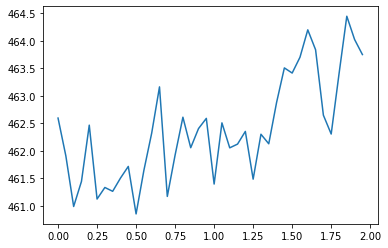

{0.1: 2, 0.4: 2, 0.15000000000000002: 1, 0.30000000000000004: 1, 0.05: 1, 0.9500000000000001: 1, 0.0: 1, 0.5: 1}
best_alpha =  0.1


In [ ]:
n_samples = 100
n_features = 1
noise = 20
X_full, t_full = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
X_train, t_train, X_test, t_test = split_dataset(X_full, t_full)
X_real, t_real = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=0., random_state=37)


model = RidgeRegression(alpha=0.24)
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)
# print(X_train_feat)
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)
print("Mean Squared Error")
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

print("Root Mean Squared Error")
print("Train error:", root_mean_squared_error(y_train, t_train))
print("Test  error:", root_mean_squared_error(y_test, t_test))

plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="line")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    np.squeeze(X_test), y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()


(N, D) = X_full.shape

best_alpha = {}

for iter in range(10):
  alpha_errors = {}

  alpha_interval = np.arange(0, 2, 0.05)
  for alpha in alpha_interval:
    error_train = []
    error_test = []
    for j in range(100):
      X_subsamples = list()
      t_subsamples = list()

      indices = np.random.permutation(N)
      X_rand = X_full[indices]
      T_rand = t_full[indices]

      for i in range(0, 100, 10):
        X_subsamples.append(X_rand[i:i+10])
        t_subsamples.append(T_rand[i:i+10])

      k_test_errors = []
      for test in range(10):
        x_test_subsample = X_subsamples[test]
        t_test_subsample = t_subsamples[test]

        before = []
        after = []
        x_train_subsample = []
        t_train_subsample = []
        if test != 0 and test != 9:
          before = np.vstack(X_subsamples[:test])
          after = np.vstack(X_subsamples[test+1:])
          x_train_subsample = np.vstack((before, after))

          before = np.vstack(t_subsamples[:test])
          after = np.vstack(t_subsamples[test+1:])
          t_train_subsample = np.vstack((before, after))

          t_train_subsample = [elem for sublist in t_train_subsample for elem in sublist]
        else:
            if test == 0:
              after = np.vstack(X_subsamples[test+1:])
              x_train_subsample = np.vstack(after)

              after = np.vstack(t_subsamples[test+1:])
              t_train_subsample = np.vstack(after)

              t_train_subsample = [elem for sublist in t_train_subsample for elem in sublist]
            else:
              before = np.vstack(X_subsamples[:test])
              x_train_subsample = np.vstack(before)

              before = np.vstack(t_subsamples[:test])
              t_train_subsample = np.vstack(before)

              t_train_subsample = [elem for sublist in t_train_subsample for elem in sublist]

        model = RidgeRegression(alpha)
        X_train_feat = extract_polynomial_features(x_train_subsample, 1)
        X_test_feat = extract_polynomial_features(x_test_subsample, 1)

        model.fit(X_train_feat, t_train_subsample)

        y_train = model.predict(X_train_feat, return_std=False) 
        y_test, y_test_std = model.predict(X_test_feat, return_std=True)
        error_train.append(mean_squared_error(y_train, t_train_subsample))
        error_test.append(mean_squared_error(y_test, t_test_subsample))
        k_test_errors.append(mean_squared_error(y_test, t_test_subsample))
        # print(test," ",mean_squared_error(y_test, t_test_subsample))
        # print("Mean Squared Error")
        # print("Train error:", mean_squared_error(y_train, t_train_subsample))
        # print("Test  error:", mean_squared_error(y_test, t_test_subsample))

        # print("Root Mean Squared Error")
        # print("Train error:", root_mean_squared_error(y_train, t_train_subsample))
        # print("Test  error:", root_mean_squared_error(y_test, t_test_subsample))

        # plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
        # plt.plot(X_real, t_real, label="line")
        # plt.plot(x_test_subsample, y_test, label="prediction")
        # plt.fill_between(
        #     np.squeeze(x_test_subsample), y_test - y_test_std, y_test + y_test_std,
        #     color="orange", alpha=0.5, label="std.")
        # plt.legend()
        # plt.show()
      # print(sum(k_test_errors)/10)

    # print("Alpha = ", alpha)
    # print("Train error:", sum(error_train)/len(error_train))
    # print("Test error:", sum(error_test)/len(error_test))
    # plot_x = [i for i in range(1000)]
    # print(len(error_test))
    # plt.scatter(plot_x, error_test, facecolor="none", edgecolor="b", s=50, label="test")
    # plt.show()
    alpha_errors[alpha] = sum(error_test)/len(error_test)

  print(alpha_errors)
  print(alpha_errors.values())
  key = min(alpha_errors,key=alpha_errors.get)
  value = alpha_errors[min(alpha_errors,key=alpha_errors.get)]
  print(key, " ", value)
  plt.plot(alpha_interval, list(alpha_errors.values()))
  plt.show()
  
  if best_alpha.get(key) is not None:
    best_alpha[key] = best_alpha.get(key) + 1
  else:
    best_alpha[key] = 1

best_alpha_key = max(best_alpha,key=best_alpha.get)
print(best_alpha)
print("best_alpha = ", best_alpha_key)